In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 random samples
n_samples = 100
x = np.linspace(0, 10, n_samples)

# True parameters and noisy data
true_slope = 2.5
true_intercept = 1.0
noise_std = 3.0  # Standard deviation of Gaussian noise

y_true = true_slope * x + true_intercept
y_noisy = y_true + np.random.normal(0, noise_std, n_samples)

# Manual linear regression function
def linear_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)
    a = numerator / denominator
    b = y_mean - a * x_mean
    return a, b

# Calculate coefficients
a_manual, b_manual = linear_regression(x, y_noisy)

# Compare with scikit-learn
model = LinearRegression().fit(x.reshape(-1,1), y_noisy)
a_sklearn = model.coef_[0]
b_sklearn = model.intercept_

# Predictions
y_pred_manual = a_manual * x + b_manual
y_pred_sklearn = model.predict(x.reshape(-1,1))

# Calculate metrics
mse_manual = mean_squared_error(y_noisy, y_pred_manual)
r2_manual = r2_score(y_noisy, y_pred_manual)

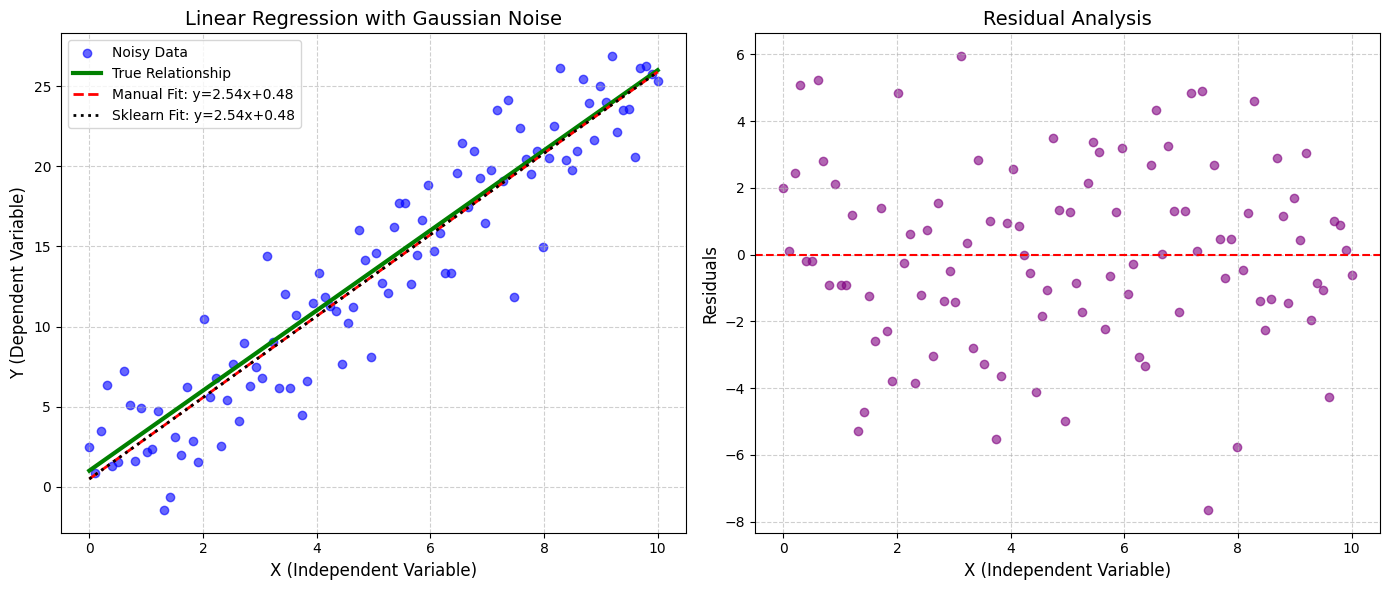

In [3]:
# Create figure
plt.figure(figsize=(14, 6))

# Main plot
plt.subplot(1, 2, 1)
plt.scatter(x, y_noisy, color='blue', alpha=0.6, label='Noisy Data')
plt.plot(x, y_true, 'g-', linewidth=3, label='True Relationship')
plt.plot(x, y_pred_manual, 'r--', linewidth=2, label=f'Manual Fit: y={a_manual:.2f}x+{b_manual:.2f}')
plt.plot(x, y_pred_sklearn, 'k:', linewidth=2, label=f'Sklearn Fit: y={a_sklearn:.2f}x+{b_sklearn:.2f}')
plt.xlabel('X (Independent Variable)', fontsize=12)
plt.ylabel('Y (Dependent Variable)', fontsize=12)
plt.title('Linear Regression with Gaussian Noise', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_noisy - y_pred_manual
plt.scatter(x, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X (Independent Variable)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Analysis', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [4]:
# Print results
print("="*50)
print(f"{'Regression Results':^50}")
print("="*50)
print(f"{'True Parameters':<25}: y = {true_slope:.2f}x + {true_intercept:.2f}")
print(f"{'Manual Calculation':<25}: y = {a_manual:.4f}x + {b_manual:.4f}")
print(f"{'Scikit-learn':<25}: y = {a_sklearn:.4f}x + {b_sklearn:.4f}")
print("\nPerformance Metrics:")
print(f"{'Mean Squared Error (MSE)':<25}: {mse_manual:.4f}")
print(f"{'R-squared (R²)':<25}: {r2_manual:.4f}")
print(f"{'Noise Standard Deviation':<25}: {noise_std:.2f}")
print("="*50)

                Regression Results                
True Parameters          : y = 2.50x + 1.00
Manual Calculation       : y = 2.5414x + 0.4816
Scikit-learn             : y = 2.5414x + 0.4816

Performance Metrics:
Mean Squared Error (MSE) : 7.3341
R-squared (R²)           : 0.8822
Noise Standard Deviation : 3.00


In [ ]:
# Finish